In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [2]:
df_housing = pd.read_csv('./dataset/housing.csv')

## EDA

In [3]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df_housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
boolean_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

df_housing[boolean_features] = (df_housing[boolean_features] == 'yes').astype(int)

In [6]:
df_housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [7]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


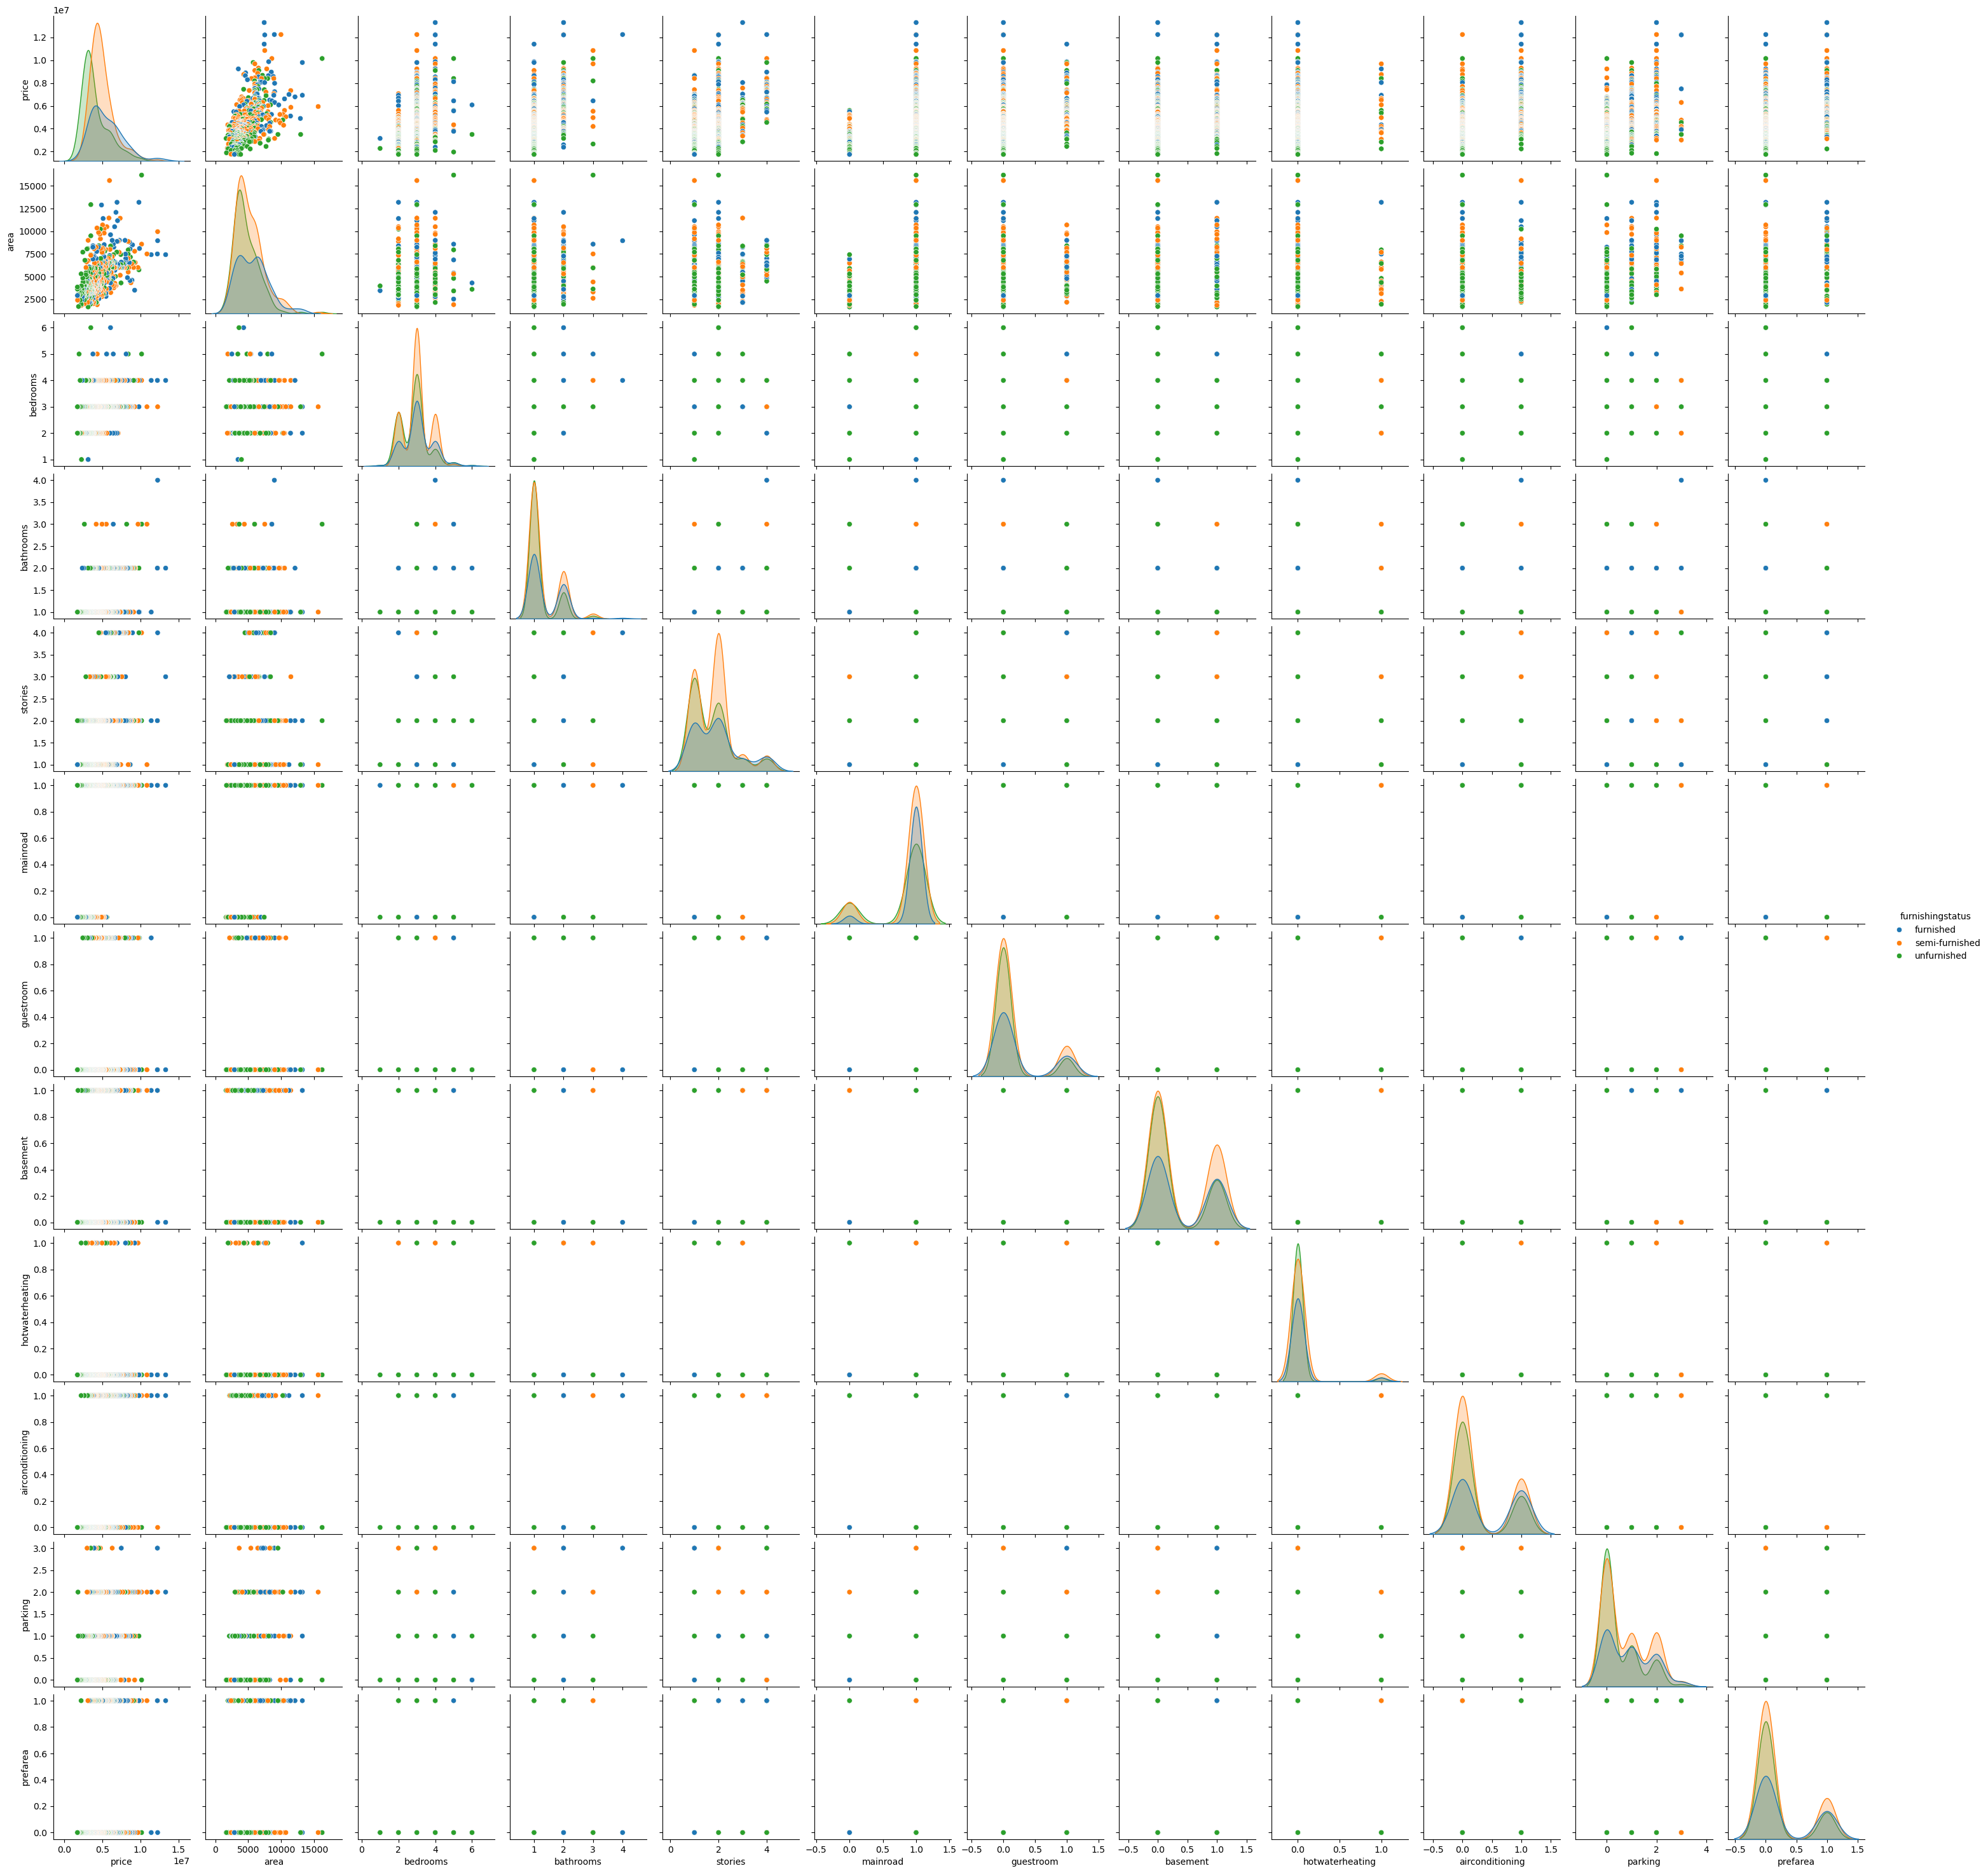

In [8]:
sns.pairplot(df_housing,hue='furnishingstatus')

In [9]:
percentual_furnishingstatus = df_housing.value_counts('furnishingstatus') / len(df_housing) * 100
px.bar(percentual_furnishingstatus,color=percentual_furnishingstatus.index)

<Axes: xlabel='bathrooms', ylabel='price'>

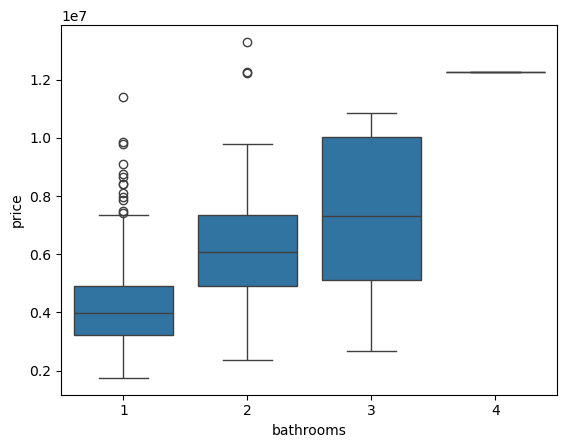

In [10]:
sns.boxplot(df_housing,x='bathrooms',y='price')

<Axes: xlabel='airconditioning', ylabel='price'>

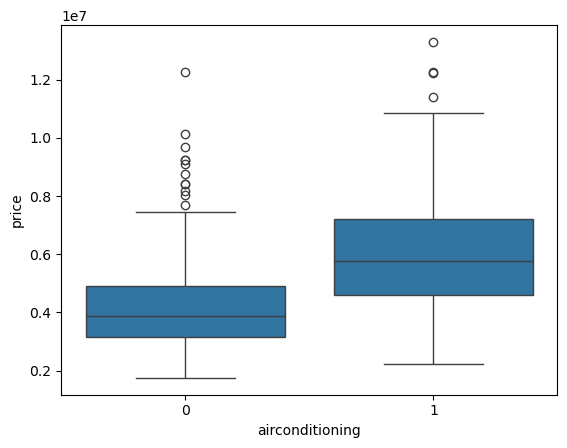

In [11]:
sns.boxplot(df_housing,x='airconditioning',y='price')

<Axes: xlabel='parking', ylabel='price'>

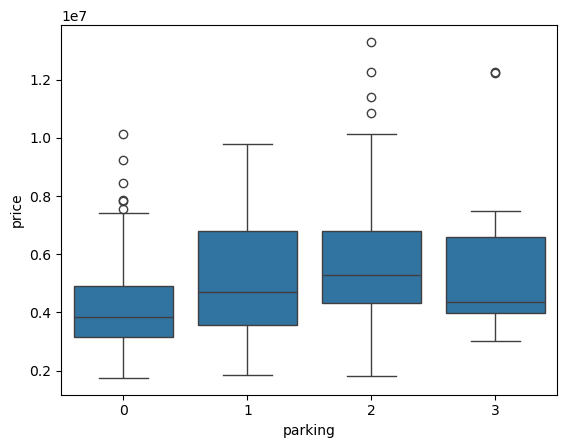

In [12]:
sns.boxplot(df_housing,x='parking',y='price')

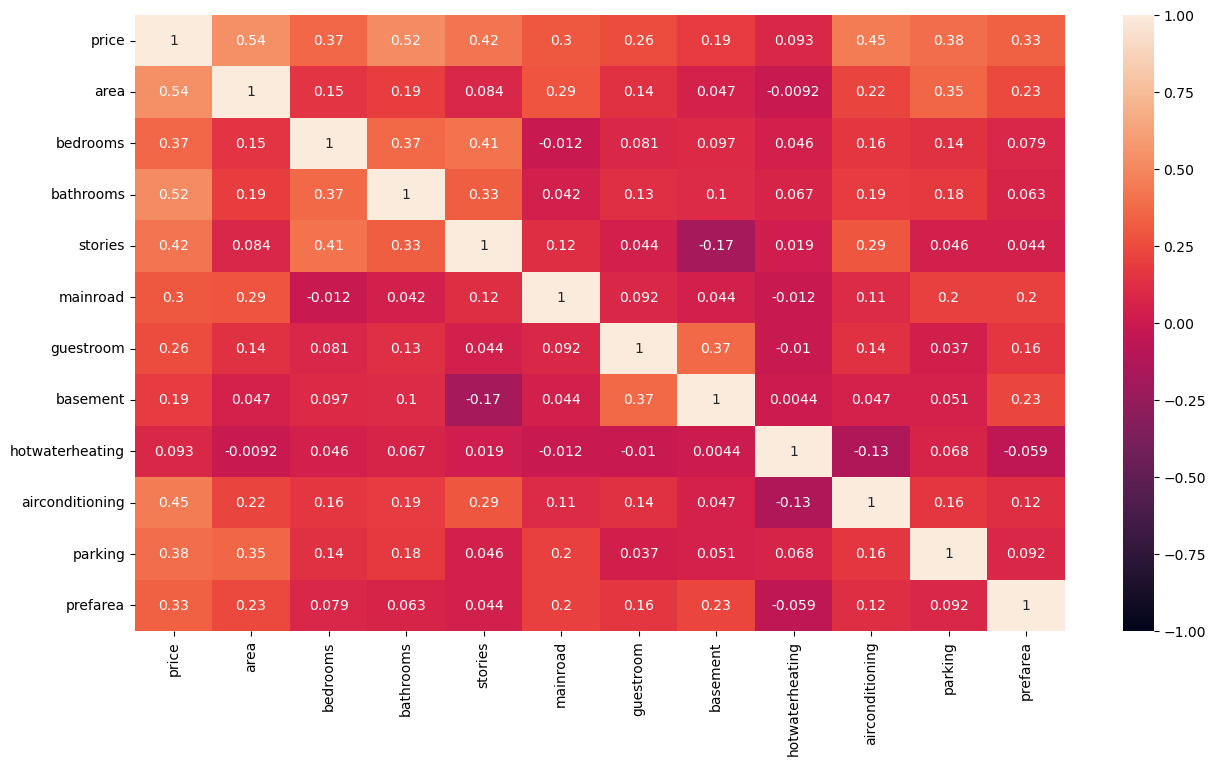

In [13]:
plt.figure(figsize=(15,8))
matrix_corr = df_housing.corr(numeric_only=True)
sns.heatmap(matrix_corr,vmin=-1,vmax=1,annot=True)
plt.show()

## Normalizar os dados

In [14]:
X = df_housing.copy()

numerical_features = ['price','area','bedrooms','bathrooms','stories','parking']
numeric_transformer = StandardScaler()

preprocess = ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numerical_features)
    ]
)

X_transformed = preprocess.fit_transform(X)

In [15]:
X_transformed.shape, X_transformed

((545, 6),
 array([[ 4.56636513,  1.04672629,  1.40341936,  1.42181174,  1.37821692,
          1.51769249],
        [ 4.00448405,  1.75700953,  1.40341936,  5.40580863,  2.53202371,
          2.67940935],
        [ 4.00448405,  2.21823241,  0.04727831,  1.42181174,  0.22441013,
          1.51769249],
        ...,
        [-1.61432675, -0.70592066, -1.30886273, -0.57018671, -0.92939666,
         -0.80574124],
        [-1.61432675, -1.03338891,  0.04727831, -0.57018671, -0.92939666,
         -0.80574124],
        [-1.61432675, -0.5998394 ,  0.04727831, -0.57018671,  0.22441013,
         -0.80574124]], shape=(545, 6)))

In [16]:
modelo_pca = PCA(n_components=3)
X_pca = modelo_pca.fit_transform(X_transformed)

In [17]:
autovetores = modelo_pca.explained_variance_
autovalores = modelo_pca.components_

print(f'Autovetores: {autovetores}')
print(f'Autovalores: {autovalores}')

Autovetores: [2.56080386 1.21938604 0.67838623]
Autovalores: [[ 0.53954388  0.36853837  0.39151808  0.43221312  0.36828623  0.31199766]
 [ 0.12034856  0.51785288 -0.38223931 -0.21166854 -0.49172967  0.53351297]
 [-0.24279104 -0.5157576   0.38949056 -0.01788812 -0.12475034  0.71236303]]


In [20]:
df_pca = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3'])
df_pca.head()

,PC1,PC2,PC3
0,4.994598,0.386209,-0.218130
1,7.462525,-0.104447,0.164316
2,4.167298,2.010987,-1.070189
3,4.632453,1.522593,0.875309
4,3.163012,1.253495,0.206997


In [21]:
df_housing['PC1'] = df_pca['PC1']
df_housing['PC2'] = df_pca['PC2']
df_housing['PC3'] = df_pca['PC3']

In [22]:
df_housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,PC1,PC2,PC3
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,4.994598,0.386209,-0.218130
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,7.462525,-0.104447,0.164316
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,4.167298,2.010987,-1.070189
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,4.632453,1.522593,0.875309
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,3.163012,1.253495,0.206997


## Visualizar os resultados

In [23]:
px.scatter_3d(df_housing,x='PC1',y='PC2',z='PC3',color='furnishingstatus',
              title='Visualização PCA', width=800, height=600, hover_data=['furnishingstatus'])

In [24]:
X_recovered = modelo_pca.inverse_transform(X_pca)

reconstruction_error = mean_squared_error(X_transformed, X_recovered)

print(f'Reconstruction error: {reconstruction_error}')

Reconstruction error: 0.25826745765255144


# Análise sugerida Gemini para estudos:

Para interpretar o PCA e escrever um relatório acadêmico ou técnico de qualidade, você deve focar no que cada **Componente Principal (PC)** representa em termos das características originais das casas.

Como as variáveis foram normalizadas com `StandardScaler`, o valor da variância total é igual ao número de variáveis (6). Seus autovalores (que estão salvos como `autovetores` no seu código) são **2.56**, **1.21** e **0.67**.

Aqui está a análise detalhada dos fatores que você identificou:

---

### 1. Interpretação dos Componentes (Os Fatores)

Olhando para os pesos (loadings) que aparecem em `modelo_pca.components_` e comparando com a ordem das colunas em `numerical_features`:

| Variável | PC1 (Peso) | PC2 (Peso) | PC3 (Peso) |
| --- | --- | --- | --- |
| **price** | 0.53 | 0.12 | -0.24 |
| **area** | 0.36 | 0.51 | -0.51 |
| **bedrooms** | 0.39 | -0.38 | 0.38 |
| **bathrooms** | 0.43 | -0.21 | -0.01 |
| **stories** | 0.36 | -0.49 | -0.12 |
| **parking** | 0.31 | 0.53 | 0.71 |

#### **PC1: O Fator "Padrão do Imóvel"**

* **Interpretação:** Todos os pesos são positivos e significativos (entre 0.31 e 0.53).
* **O que escrever:** "O primeiro componente representa o porte geral e o valor do imóvel. Casas com valores altos de PC1 são maiores, possuem mais quartos/banheiros e são mais caras. Ele captura a 'magnitude' da residência."

#### **PC2: O Fator "Horizontalidade vs. Densidade"**

* **Interpretação:** Tem pesos positivos altos para **area** (0.51) e **parking** (0.53), mas pesos negativos para **stories** (-0.49) e **bedrooms** (-0.38).
* **O que escrever:** "O segundo componente diferencia o estilo da construção. Valores altos de PC2 indicam casas térreas ou com poucos andares, mas que possuem grandes terrenos e muitas vagas de garagem. Valores baixos indicam casas com muitos pavimentos e dormitórios, porém em terrenos mais compactos."

#### **PC3: O Fator "Conveniência de Garagem"**

* **Interpretação:** É dominado pelo peso de **parking** (0.71) e negativamente afetado pela **area** (-0.51).
* **O que escrever:** "Este componente destaca imóveis que priorizam vagas de garagem mesmo em terrenos menores."

---

### 2. Eficiência do Modelo (Variância Explicada)

Você deve mencionar que o uso de 3 componentes é adequado.

* **Cálculo:** O PC1 explica cerca de 42% da variância (), o PC2 explica 20% e o PC3 cerca de 11%.
* **Conclusão:** "Com apenas 3 variáveis sintéticas (os PCs), conseguimos preservar aproximadamente **73% da informação original** do dataset."
* **Erro de Reconstrução:** O erro de **0.258** é considerado baixo para dados normalizados, validando que a perda de informação na compressão foi aceitável para uma análise exploratória.

---

### Sugestão de texto para o seu estudo:

> "A análise de componentes principais revelou que a maior parte da variabilidade dos dados (42%) está concentrada em um fator de escala global (PC1), que correlaciona positivamente preço e infraestrutura física. O PC2 revelou um trade-off interessante entre a área do terreno e a verticalização da construção. A visualização 3D demonstra que, embora o PCA condense bem as informações físicas, o status de mobília (`furnishingstatus`) não apresenta uma separação linear clara baseada apenas nestas métricas, sugerindo que a decisão de mobiliar um imóvel não depende estritamente do seu tamanho ou preço."
